In [38]:
%matplotlib inline
import pandas as pd
import pandas_datareader
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [39]:
stock=pd.read_csv(r'C:\Users\Ordinary\Desktop\T10yr.csv',index_col=0,parse_dates=[0])
stock.tail(10)

,open,high,low,close,volume,Adj Close
date,,,,,,
2018-01-25,78.47,79.38,78.345,79.25,2327262,ZTS
2018-01-26,79.49,80.13,79.380,80.09,2532808,ZTS
2018-01-29,79.81,79.95,79.110,79.18,2662383,ZTS
2018-01-30,78.44,78.69,77.910,78.35,3808707,ZTS
2018-01-31,78.49,78.77,76.540,76.73,4136360,ZTS
2018-02-01,76.84,78.27,76.690,77.82,2982259,ZTS
2018-02-02,77.53,78.12,76.730,76.78,2595187,ZTS
2018-02-05,76.64,76.92,73.180,73.83,2962031,ZTS
2018-02-06,72.74,74.56,72.130,73.27,4924323,ZTS


In [51]:
stock_week=stock['close'].resample('W-MON').mean()
stock_train=stock_week['2000':'2018']

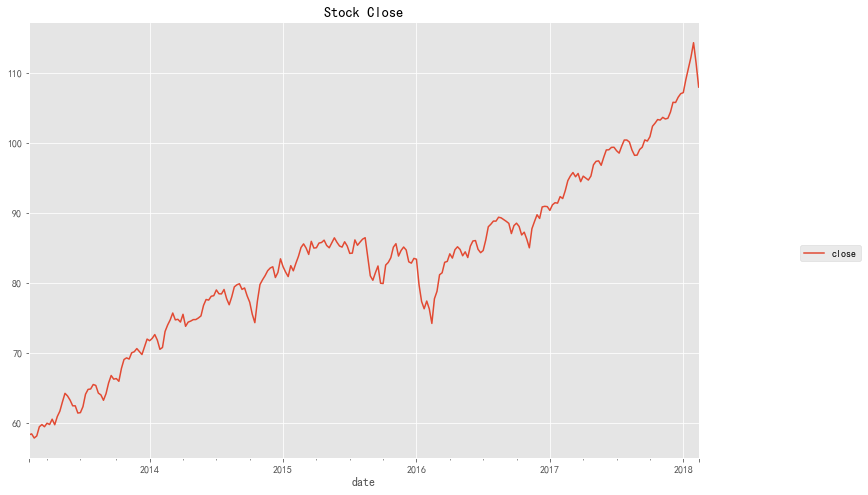

In [52]:
stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25,0.5))
plt.title('Stock Close')
sns.despine()

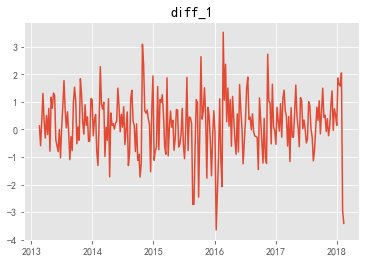

In [53]:
stock_diff=stock_train.diff()
stock_diff=stock_diff.dropna()

plt.figure()
plt.plot(stock_diff)
plt.title('diff_1')
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


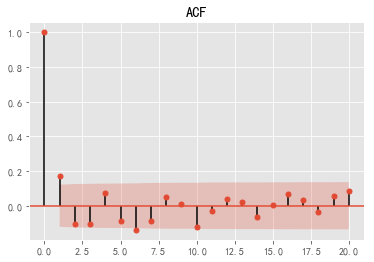

In [54]:
acf=plot_acf(stock_diff,lags=20)
plt.title('ACF')
acf.show()

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


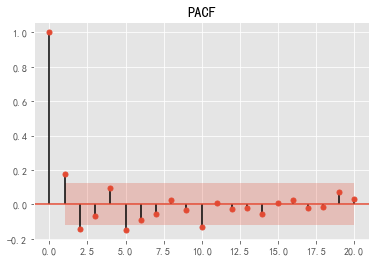

In [55]:
pacf=plot_pacf(stock_diff,lags=20)
plt.title('PACF')
pacf.show()

In [56]:
model=ARIMA(stock_train,order=(1,1,1),freq='W-MON')

In [57]:
result=model.fit()
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  261
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -379.292
Method:                       css-mle   S.D. of innovations              1.035
Date:                Sat, 10 Feb 2018   AIC                            766.585
Time:                        20:11:15   BIC                            780.843
Sample:                    02-18-2013   HQIC                           772.316
                         - 02-12-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1884      0.076      2.474      0.014       0.039       0.338
ar.L1.D.close    -0.0792      0.185     -0.428      0.669      -0.442       0.284
ma.L1.D.close     0.2838      0.170     

In [65]:
#print(result.predict())
pred=result.predict('20130325','20130909',dynamic=True,typ='levels')
print(pred)

2013-03-25    59.939252
2013-04-01    60.130342
2013-04-08    60.318571
2013-04-15    60.507027
2013-04-22    60.695465
2013-04-29    60.883904
2013-05-06    61.072342
2013-05-13    61.260781
2013-05-20    61.449220
2013-05-27    61.637659
2013-06-03    61.826098
2013-06-10    62.014537
2013-06-17    62.202976
2013-06-24    62.391415
2013-07-01    62.579854
2013-07-08    62.768293
2013-07-15    62.956732
2013-07-22    63.145171
2013-07-29    63.333610
2013-08-05    63.522048
2013-08-12    63.710487
2013-08-19    63.898926
2013-08-26    64.087365
2013-09-02    64.275804
2013-09-09    64.464243
Freq: W-MON, dtype: float64


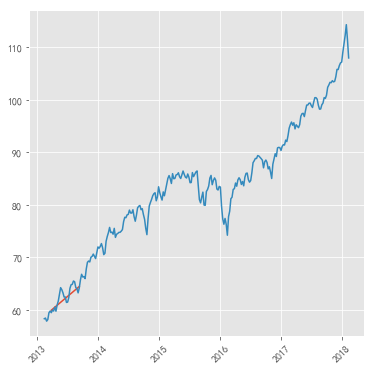

In [66]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)